Getting the last one year data NIFTY 50 FROM NSE official portal. Here the 'nsepy' python is used to get the data. Nsepy library allows us to get the all stocks data from portal.

In [2]:
#Importing necessary libraries
from nsepy import get_history
import pandas as pd
import numpy as np
from datetime import date

In [13]:
# defining the timerange to get data

start_date = date(2018,2,1)  # Feb 2 2018
end_date   = date(2019,1,31) # Jan 31 2019
symbol     = 'NIFTY 50'

In [56]:
#storing the data into nifty_50 data frame
nifty_50 = pd.DataFrame(get_history(symbol = symbol, start= start_date, end= end_date, index= True))
nifty_50.head()

,Open,High,Low,Close,Volume,Turnover
Date,,,,,,
2018-02-01,11044.55,11117.35,10878.80,11016.90,315743486,1.771940e+11
2018-02-02,10938.20,10954.95,10736.10,10760.60,291431992,1.654251e+11
2018-02-05,10604.30,10702.75,10586.80,10666.55,247479157,1.398063e+11
2018-02-06,10295.15,10594.15,10276.30,10498.25,274656443,1.560634e+11
2018-02-07,10607.20,10614.00,10446.40,10476.70,258095424,1.397166e+11
2018-02-08,10518.50,10637.80,10479.55,10576.85,239407938,1.256923e+11
2018-02-09,10416.50,10480.20,10398.20,10454.95,197502912,1.060215e+11
2018-02-12,10518.20,10555.50,10485.40,10539.75,224114801,1.113378e+11
2018-02-14,10585.75,10590.55,10456.65,10500.90,236329440,1.218894e+11


In [57]:
#calculating the rolling mean of each column using pandas rolling attribute
nifty_50_rolling_mean = nifty_50.rolling(window=10).mean()
nifty_50_rolling_mean.head(20)

,Open,High,Low,Close,Volume,Turnover
Date,,,,,,
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-02,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-05,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-06,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-07,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-08,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-09,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-12,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-14,NaN,NaN,NaN,NaN,NaN,NaN


Since we are calculating the rolling mean for window 10 so intial 10 rows have nan values.

In [ ]:
nifty_50['Date'] = nifty_50.index
nifty_50_rolling_mean['Date'] = nifty_50_rolling_mean.index

In [59]:
#merging the both nitfy sets
new_nifty_50 = pd.merge(nifty_50, nifty_50_rolling_mean, on='Date', how='left',suffixes=('', '_roll'))
new_nifty_50.head(25)

,Open,High,Low,Close,Volume,Turnover,Date,Open_roll,High_roll,Low_roll,Close_roll,Volume_roll,Turnover_roll
0,11044.55,11117.35,10878.80,11016.90,315743486,1.771940e+11,2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN
1,10938.20,10954.95,10736.10,10760.60,291431992,1.654251e+11,2018-02-02,NaN,NaN,NaN,NaN,NaN,NaN
2,10604.30,10702.75,10586.80,10666.55,247479157,1.398063e+11,2018-02-05,NaN,NaN,NaN,NaN,NaN,NaN
3,10295.15,10594.15,10276.30,10498.25,274656443,1.560634e+11,2018-02-06,NaN,NaN,NaN,NaN,NaN,NaN
4,10607.20,10614.00,10446.40,10476.70,258095424,1.397166e+11,2018-02-07,NaN,NaN,NaN,NaN,NaN,NaN
5,10518.50,10637.80,10479.55,10576.85,239407938,1.256923e+11,2018-02-08,NaN,NaN,NaN,NaN,NaN,NaN
6,10416.50,10480.20,10398.20,10454.95,197502912,1.060215e+11,2018-02-09,NaN,NaN,NaN,NaN,NaN,NaN
7,10518.20,10555.50,10485.40,10539.75,224114801,1.113378e+11,2018-02-12,NaN,NaN,NaN,NaN,NaN,NaN
8,10585.75,10590.55,10456.65,10500.90,236329440,1.218894e+11,2018-02-14,NaN,NaN,NaN,NaN,NaN,NaN
9,10537.90,10618.10,10511.05,10545.50,217090245,1.103538e+11,2018-02-15,10606.625,10686.535,10525.525,10603.695,250185183.8,1.353500e+11


In [55]:
new_nifty_50.index = new_nifty_50['Date']
new_nifty_50 =new_nifty_50.drop(columns=['Date'])
new_nifty_50.head(25)

,Open,High,Low,Close,Volume,Turnover,Open_roll,High_roll,Low_roll,Close_roll,Volume_roll,Turnover_roll
Date,,,,,,,,,,,,
2018-02-01,11044.55,11117.35,10878.80,11016.90,315743486,1.771940e+11,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-02,10938.20,10954.95,10736.10,10760.60,291431992,1.654251e+11,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-05,10604.30,10702.75,10586.80,10666.55,247479157,1.398063e+11,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-06,10295.15,10594.15,10276.30,10498.25,274656443,1.560634e+11,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-07,10607.20,10614.00,10446.40,10476.70,258095424,1.397166e+11,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-08,10518.50,10637.80,10479.55,10576.85,239407938,1.256923e+11,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-09,10416.50,10480.20,10398.20,10454.95,197502912,1.060215e+11,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-12,10518.20,10555.50,10485.40,10539.75,224114801,1.113378e+11,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-14,10585.75,10590.55,10456.65,10500.90,236329440,1.218894e+11,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
import matplotlib.pyplot as plt

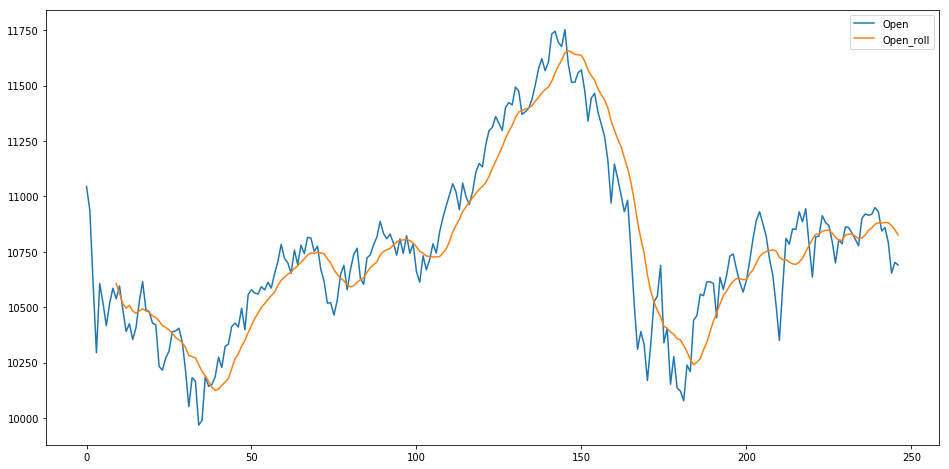

In [67]:
# a insight on Open and Open_roll columns
plt.figure(figsize=(16,8))
plt.plot( new_nifty_50['Open'], label='Open')
plt.plot( new_nifty_50['Open_roll'], label='Open_roll')
plt.legend(loc='best')
plt.show()